In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Android_Ransomeware.csv")

In [ ]:
df = df.dropna()

In [ ]:
fraction_to_keep = 0.5

# Randomly sample a fraction of the data
df = df.sample(frac=fraction_to_keep, random_state=1)

In [ ]:
df['Label'].unique()

array(['Benign', 'Charger', 'Jisut', 'Koler', 'Lockerpin', 'Pletor',
       'PornDroid', 'RansomBO', 'Simplocker', 'SVpeng', 'WannaLocker'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 88 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         392034 non-null  int64  
 1   Flow ID(F1)                        392034 non-null  object 
 2    Source IP(F2)                     392034 non-null  object 
 3    Source Port(F3)                   392034 non-null  int64  
 4    Destination IP(F4)                392034 non-null  object 
 5    Destination Port(F5)              392034 non-null  int64  
 6    Protocol(F6)                      392034 non-null  int64  
 7    Timestamp(F7)                     392034 non-null  object 
 8    Flow Duration(F8)                 392034 non-null  int64  
 9    Total Fwd Packets(F9)             392034 non-null  int64  
 10   Total Backward Packets(F10)       392034 non-null  int64  
 11  Total Length of Fwd Packets(F11)   3920

In [ ]:
print(df.select_dtypes(include=['object']).columns.tolist())

['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Label']


In [ ]:
df['Ransomware_Binary'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)


#Binary Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Select only the columns with highest correlation values
selected_columns = [' Source Port(F3)',' Destination Port(F5)',' Protocol(F6)',' Total Backward Packets(F10)',
                    'Total Length of Fwd Packets(F11)',
                    ' Fwd Packet Length Max(F13)',' Fwd Packet Length Std(F16)',
                    'Bwd Packet Length Max(F17)',' Bwd Packet Length Std(F20)',
                    'Flow Bytes/s(F21)','Bwd IAT Total(F32)',' Bwd IAT Max(F35)',' Bwd Header Length(F42)',
                    ' Bwd Packets/s(F44)',' Min Packet Length(F45)',' Max Packet Length(F46)',' Packet Length Mean(F47)',
                    ' Packet Length Variance(F49)',' SYN Flag Count(F51)',' Down/Up Ratio(F58)',' Avg Bwd Segment Size(F61)',
                    ' Subflow Bwd Bytes(F72)',
                    'Init_Win_bytes_forward(F73)',
                    ' Init_Win_bytes_backward(F74)',
                    ' Active Std(F78)',' Idle Min(F84)','Ransomware_Binary']

# selected_columns = [' Source Port',' Destination Port',' Total Fwd Packets','Subflow Fwd Packets',' Subflow Bwd Bytes',
#                     'Init_Win_bytes_forward',' act_data_pkt_fwd',' Idle Min', 'Label_Encoded']
df_selected = df[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Ransomware_Binary', axis=1)
y = df_selected['Ransomware_Binary']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# SVM model
# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# svm_preds = svm_model.predict(X_test)

# Decode the predicted labels back to original string labels
rf_preds_labels = label_encoder.inverse_transform(rf_preds)
# svm_preds_labels = label_encoder.inverse_transform(svm_preds)



In [ ]:
from sklearn.metrics import confusion_matrix

cmrf = confusion_matrix(y_test, rf_preds)

<Axes: >

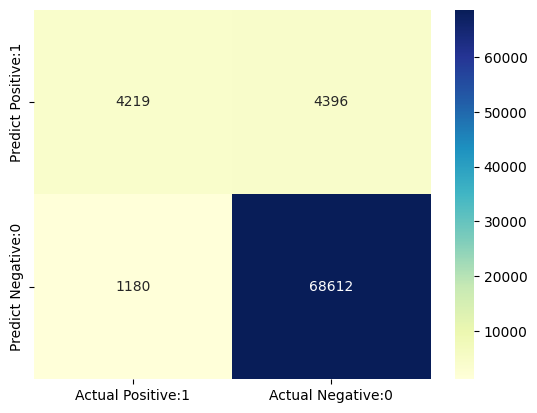

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cmrf, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

# # Evaluate SVM model
# svm_accuracy = accuracy_score(y_test, svm_preds)
# svm_precision = precision_score(y_test, svm_preds, average='weighted')
# svm_recall = recall_score(y_test, svm_preds, average='weighted')
# svm_f1 = f1_score(y_test, svm_preds, average='weighted')

# Print the results
print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("\n")

# print("SVM Model:")
# print("Accuracy:", svm_accuracy)
# print("Precision:", svm_precision)
# print("Recall:", svm_recall)
# print("F1-score:", svm_f1)

Random Forest Model:
Accuracy: 0.9288839006721339
Precision: 0.9223890460789486
Recall: 0.9288839006721339
F1-score: 0.9215246718594269




In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60      8615
           1       0.94      0.98      0.96     69792

    accuracy                           0.93     78407
   macro avg       0.86      0.74      0.78     78407
weighted avg       0.92      0.93      0.92     78407



#CNN for Binary

In [ ]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Assuming you have already loaded the DataFrame 'df' with the necessary columns
# df = pd.read_csv("your_dataset.csv")

# Create a new column 'Ransomware_Binary' and assign 0 to 'Benign' and 1 to other ransomware types
df['Ransomware_Binary'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Drop the original 'Label' column and 'Label_Encoded' column as they are no longer needed
# df.drop(['Label', 'Label_Encoded'], axis=1, inplace=True)

# Select only the columns with selected features
selected_columns = [' Source Port(F3)',' Destination Port(F5)',' Protocol(F6)',' Total Backward Packets(F10)',
                    'Total Length of Fwd Packets(F11)',
                    ' Fwd Packet Length Max(F13)',' Fwd Packet Length Std(F16)',
                    'Bwd Packet Length Max(F17)',' Bwd Packet Length Std(F20)',
                    'Flow Bytes/s(F21)','Bwd IAT Total(F32)',' Bwd IAT Max(F35)',' Bwd Header Length(F42)',
                    ' Bwd Packets/s(F44)',' Min Packet Length(F45)',' Max Packet Length(F46)',' Packet Length Mean(F47)',
                    ' Packet Length Variance(F49)',' SYN Flag Count(F51)',' Down/Up Ratio(F58)',' Avg Bwd Segment Size(F61)',
                    ' Subflow Bwd Bytes(F72)',
                    'Init_Win_bytes_forward(F73)',
                    ' Init_Win_bytes_backward(F74)',
                    ' Active Std(F78)',' Idle Min(F84)','Ransomware_Binary']

df_selected = df[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Ransomware_Binary', axis=1)
y = df_selected['Ransomware_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Convert the target variable to one-hot encoded form
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Reshape the input data to fit the CNN-like model
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_categorical)
print("CNN Model Accuracy:", accuracy)


Epoch 1/10
9801/9801 [==============================] - 43s 4ms/step - loss: 1851.9928 - accuracy: 0.8403
Epoch 2/10
9801/9801 [==============================] - 33s 3ms/step - loss: 6.4417 - accuracy: 0.8895
Epoch 3/10
9801/9801 [==============================] - 32s 3ms/step - loss: 1.1401 - accuracy: 0.8900
Epoch 4/10
9801/9801 [==============================] - 37s 4ms/step - loss: 1.2918 - accuracy: 0.8900
Epoch 5/10
9801/9801 [==============================] - 44s 4ms/step - loss: 0.7754 - accuracy: 0.8901
Epoch 6/10
9801/9801 [==============================] - 31s 3ms/step - loss: 0.3465 - accuracy: 0.8901
Epoch 7/10
9801/9801 [==============================] - 30s 3ms/step - loss: 0.3466 - accuracy: 0.8901
Epoch 8/10
9801/9801 [==============================] - 32s 3ms/step - loss: 0.3466 - accuracy: 0.8901
Epoch 9/10
9801/9801 [==============================] - 30s 3ms/step - loss: 0.3465 - accuracy: 0.8901
Epoch 10/10
2451/2451 [==============================] - 4s 2ms/step -

In [ ]:
# Evaluate the model on the test set
y_pred_categorical = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_categorical, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)

# Calculate the evaluation metrics
cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred)
cnn_recall = recall_score(y_test, y_pred)
cnn_f1 = f1_score(y_test, y_pred)

# Print the results
print("CNN Model Evaluation:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

2451/2451 [==============================] - 9s 3ms/step
CNN Model Evaluation:
Accuracy: 0.8901246062213833
Precision: 0.8901246062213833
Recall: 1.0
F1-score: 0.9418687035675004


#SVM for Binary

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# label_encoder = LabelEncoder()
# df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Select only the columns with highest correlation values
selected_columns = [' Source Port(F3)',' Destination Port(F5)',' Protocol(F6)',' Total Backward Packets(F10)',
                    'Total Length of Fwd Packets(F11)',
                    ' Fwd Packet Length Max(F13)',' Fwd Packet Length Std(F16)',
                    'Bwd Packet Length Max(F17)',' Bwd Packet Length Std(F20)',
                    'Flow Bytes/s(F21)','Bwd IAT Total(F32)',' Bwd IAT Max(F35)',' Bwd Header Length(F42)',
                    ' Bwd Packets/s(F44)',' Min Packet Length(F45)',' Max Packet Length(F46)',' Packet Length Mean(F47)',
                    ' Packet Length Variance(F49)',' SYN Flag Count(F51)',' Down/Up Ratio(F58)',' Avg Bwd Segment Size(F61)',
                    ' Subflow Bwd Bytes(F72)',
                    'Init_Win_bytes_forward(F73)',
                    ' Init_Win_bytes_backward(F74)',
                    ' Active Std(F78)',' Idle Min(F84)','Ransomware_Binary']

# selected_columns = [' Source Port',' Destination Port',' Total Fwd Packets','Subflow Fwd Packets',' Subflow Bwd Bytes',
#                     'Init_Win_bytes_forward',' act_data_pkt_fwd',' Idle Min', 'Label_Encoded']
df_selected = df[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Ransomware_Binary', axis=1)
y = df_selected['Ransomware_Binary']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Random Forest model
# rf_model = RandomForestClassifier(n_estimators = 100,random_state = 1)
# rf_model.fit(X_train, y_train)
# rf_preds = rf_model.predict(X_test)

# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Decode the predicted labels back to original string labels
# rf_preds_labels = label_encoder.inverse_transform(rf_preds)
svm_preds_labels = label_encoder.inverse_transform(svm_preds)

In [ ]:
 # Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

print("SVM Model:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

SVM Model:
Accuracy: 0.8901246062213833
Precision: 0.7923218146007727
Recall: 0.8901246062213833
F1-score: 0.8383805088752662


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Select only the columns with highest correlation values
selected_columns = [' Source Port(F3)',' Destination Port(F5)',' Protocol(F6)',' Total Backward Packets(F10)',' Total Length of Bwd Packets(F12)',
                    ' Fwd Packet Length Max(F13)',' Fwd Packet Length Mean(F15)','Bwd Packet Length Max(F17)',' Bwd Packet Length Min(F18)',
                    'Flow Bytes/s(F21)',
                    'Fwd PSH Flags(F37)',' Average Packet Size(F59)',' Avg Fwd Segment Size(F60)','Subflow Fwd Packets(F69)',
                    ' Subflow Fwd Bytes(F70)','Init_Win_bytes_forward(F73)',' Init_Win_bytes_backward(F74)','Active Mean(F77)',
                    ' Active Std(F78)',' Active Max(F79)',' Active Min(F80)',' Idle Std(F82)',' Idle Max(F83)','Label_Encoded']

# selected_columns = [' Source Port',' Destination Port',' Total Fwd Packets','Subflow Fwd Packets',' Subflow Bwd Bytes',
#                     'Init_Win_bytes_forward',' act_data_pkt_fwd',' Idle Min', 'Label_Encoded']
df_selected = df[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Label_Encoded', axis=1)
y = df_selected['Label_Encoded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# SVM model
# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# svm_preds = svm_model.predict(X_test)

# Decode the predicted labels back to original string labels
rf_preds_labels = label_encoder.inverse_transform(rf_preds)
# svm_preds_labels = label_encoder.inverse_transform(svm_preds)



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cmrf = confusion_matrix(y_test, rf_preds)

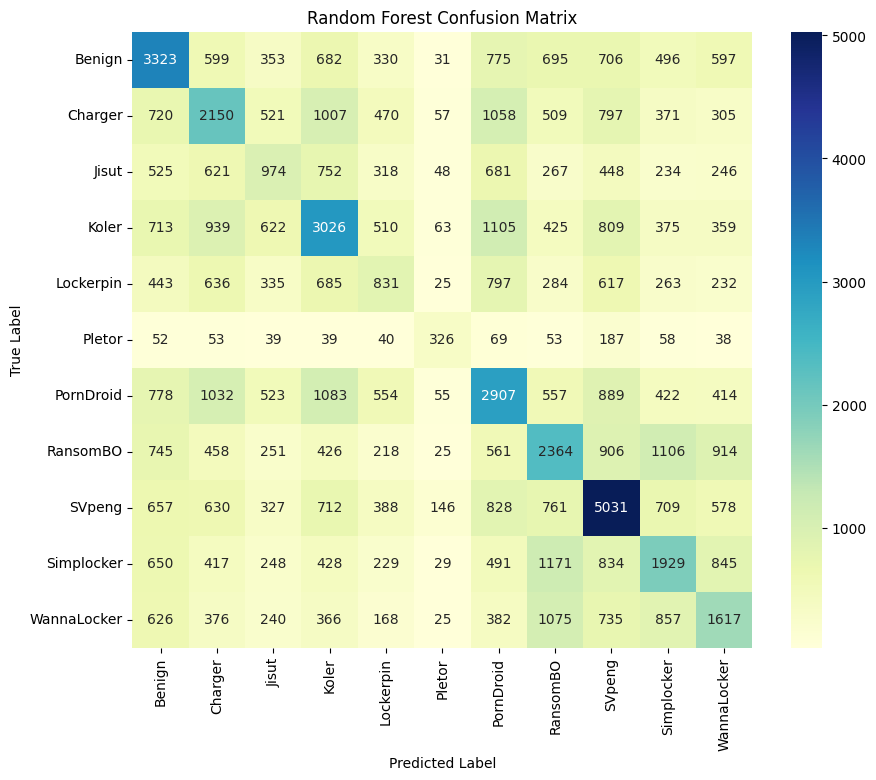

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for the confusion matrix
cmrf_matrix = pd.DataFrame(data=cmrf, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cmrf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
